<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_4_multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 9.3: DALL·E Existing Images [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* **Part 9.4: MultiModal Models** [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* Part 9.5: Illustrated Book [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions
The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain openai langchain_openai

Note: using Google CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 685.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall:

# Part 9.4: MultiModal Models

Multimodal models are advanced AI systems capable of processing and understanding multiple types of input, such as text, images, audio, and video. These models combine the power of various data types to perform more complex tasks that require an understanding of relationships between different modalities. For instance, a multimodal model can analyze an image and generate descriptive text, or it can process both text and images together to provide more nuanced insights. By integrating various modalities, these models enhance the AI's ability to interpret and interact with real-world data, making them crucial for applications like image captioning, visual question answering, and more.

In our approach, we will leverage LangChain, a framework designed for building language model-powered applications, to enable the integration of images into OpenAI's GPT-4o-mini. This setup will allow us to pass images as input alongside text, expanding the model's capability to interpret and respond to visual data. By using LangChain, we can structure prompts, handle the transfer of images, and streamline the interaction between different modalities, ultimately making GPT-4o-mini a more versatile tool for tasks that require both image and text comprehension. This will be particularly useful for applications where context from visual data is essential for generating more accurate and insightful responses.






In [2]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
import base64
import httpx
import textwrap

MODEL = "gpt-4o-mini"
image_url = 'https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_1.png'
prompt = "Describe this image."

# Initialize the GPT model
model = ChatOpenAI(model="gpt-4o-mini")

# Fetch image data and encode it in base64
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

# Create a message with both text and the image
message = HumanMessage(
    content=[
        {"type": "text", "text": prompt},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}},
    ],
)

# Get response with a modified prompt from GPT
response = model.invoke([message])

# Wrap the text output to avoid scrolling off the screen in Colab
wrapped_output = textwrap.fill(response.content, width=80)
print(wrapped_output)


The image shows a dog lounging comfortably on a pair of blue chaise lounges on a
deck. The dog appears to be a bulldog, with a stocky build and distinctive
facial features. One of the lounges is occupied by the dog, while the other is
unoccupied. In the background, there is a green lawn with trees and a white
fence, indicating a pleasant outdoor setting. The atmosphere seems relaxed and
inviting.


## Image to Art


Using this multimodal approach, we can also generate prompts that describe an image in a way that allows us to render it as a cartoon. By inputting an image alongside a text description, the model can analyze its visual components and then generate a creative, detailed prompt specifically crafted to produce a cartoon-like rendering. Once we have this prompt, we can pass it to DALLE, OpenAI's image generation model, to transform the visual data into a stylized cartoon version. This workflow allows for automated, creative transformations of images, combining the interpretive power of a multimodal model with the generative capabilities of DALLE, enabling users to create custom visual outputs from real-world images.

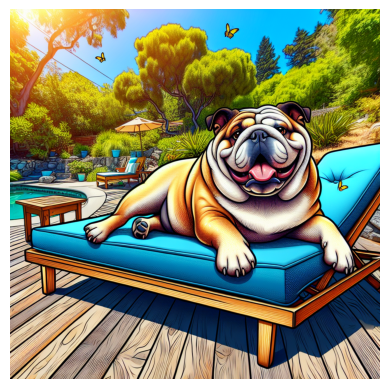

In [3]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
import base64
import httpx
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def modify_image(image_url: str, prompt: str):
    # Initialize the GPT model
    model = ChatOpenAI(model="gpt-4o-mini")

    # Fetch image data and encode it in base64
    image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

    # Create a message with both text and the image
    message = HumanMessage(
        content=[
            {"type": "text", "text": prompt},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}},
        ],
    )

    # Get response with a modified prompt from GPT
    response = model.invoke([message])
    cartoon_prompt = response.content

    # Initialize the DALL-E model to generate the image
    client = OpenAI()

    # Generate the image based on the GPT-generated cartoon prompt
    response = client.images.generate(
        model="dall-e-3",
        prompt=cartoon_prompt,
        size="1024x1024",
        quality="standard",
        n=1,
    )

    # Get the image URL from DALL-E
    image_url = response.data[0].url

    # Fetch the generated image
    response2 = requests.get(image_url)
    img = Image.open(BytesIO(response2.content))

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()

    # Return the image object in case further operations are needed
    return img

# Example of how to call the function
image_url = 'https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_1.png'
#image_url = 'https://www.heatonresearch.com/images/jeff/about-jeff-heaton-2020.jpg'

#prompt = "Output a prompt that would paint this image in the style of Dali."
prompt = "Output a prompt that would render this image as a cartoon."

img = modify_image(image_url, prompt)
img.save("result.jpg")  # Save the image as a jpeg file


## Downloading Images

In [4]:
from google.colab import files

# Download the image saved as variation_image_1.png
files.download('result.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>